### DESCRIPCIÓN DEL PROYECTO

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Objetivo:

- Establecer una base de datos para contar con información para planear una campaña para 2017.
- Comprobar si existe relación entre las reseñas de usuarios en dos diferentes consolas PC y Xbox One.
- Comprobar si existe relación entre las reseñas de usuarios y los generos Accion y deportes.

Etapas de analisis

1  DESCRIPCIÓN DEL PROYECTO.

2  PREPARAR LOS DATOS.

2.1  IMPORTACIÓN DE LIBRERIAS.

2.2  CARGA DE DATOS.

3  PREPARACIÓN DE DATOS.

3.1  CORRECCIÓN DE DATOS.

3.1.1  NOMBRE DE LAS COLUMNAS.

3.1.2  VALORES NULOS.

3.1.3  ENRIQUECER LOS DATOS.

4  ANALISIS ESTADISTICO.

4.1  EVOLUCIÓN DE LOS JUEGOS A TRAVÉS DEL TIEMPO.

4.2  EVOLUCIÓN DE LAS VENTAS A TRAVÉS DEL TIEMPO.

4.3  COMPORTAMIENTO DE LOS JUEGOS POR GENERO.
5  PERFILES DE USARIO POR REGIÓN.
6  PRUEBA DE HIPOTESIS
6.1  HIPOTESIS #1
6.2  HIPOTESIS #2
7  CONCLUSIÓN GENERAL

### PREPARAR LOS DATOS

#### IMPORTACIÓN DE LIBRERIAS

In [1]:
#Sección para importar librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats as st
from scipy.stats import levene
import scipy.stats as stats

#### CARGA DE DATOS

In [2]:
#Importar archivo CSV
games =pd.read_csv('/datasets/games.csv')

In [3]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### PREPARACIÓN DE DATOS

En un primer analisis observamos el contenido de cada una de nuestras columnas del dataframe para ir familiarizandonos con la información que contamos y ver posibles errores a corregir.

1) Name: Esta columna contiene el nombre del juego.
2) Platform: Consola en la que esta disponible el juego
3) Year_of_Release: el año de lanzamiento
4) Genre: El genero del juego
5) NA_sales: Las ventas en Norteamerica
6) EU_sales: Las ventas en Europa
7) JP_sales: Las ventas en Japon
8) Other_sales: Ventas categorizadas como otros
9) Critic_Score: la putuación del juego por la critica
10) User_Score: la puntuación por los usuarios
11) Rating: La clasificación del juego.


#### CORRECCIÓN DE DATOS

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* En primera instancia los titulos de las columnas se encuentran en combinación de mayusculas y minusculas, debemos corregir eso.
* la columna "Year_of_Release" esta almacenada como float lo cual es incorrecto y debe corregirse.
* En columnas como "Critic_Score", "User_Score" y "Rating" contamos con valores nulos que deberiamos corregir para poder trabajar con esa información.
Estos son algunos de los cambios que debemos realizar en primera instancia. 


##### NOMBRE DE LAS COLUMNAS

In [5]:
new_col_names=[] # se crea lista vacia para almacenar los nombres modificados

for old_name in games.columns:
    name_lowered = old_name.lower()
    new_col_names.append(name_lowered)
games.columns= new_col_names #se insertan los nombres corregidos al dataframe games
print(games.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Se realizo una iteración sobre todos los nombres de las columnas del dataframe para cambiar los nombres a minuscula.

#####  VALORES NULOS

In [6]:
# Se imprimen los valores nulos de todas las columnas para reemplazarlos posteriormente.
print(games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Verificamos que columnas tienen valores ausentes, para posteriormente revisar en que casos es factible eliminar o cambiar estos valores y en cuales no nos afecta.

In [7]:
games = games.dropna(subset =["name","genre"])


In [8]:
games["critic_score"].median()


71.0

In [9]:
columns_to_replace=["critic_score"]

# Se itera cada fila para reemplazar los valores nulos por 0
for col in columns_to_replace:
    games[col].fillna("71", inplace=True)
    
games["critic_score"]=games["critic_score"].astype("float")

Se reemplazan los valores ausentes en las columnas critic_score por -1 para no tener errores al momento de realizar operaciones con la columna y tener bien identificadas las filas que contienen valores modificados.

In [10]:
# Se comprueban nuevamente los valores nulos existentes.
print(games.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6699
rating             6764
dtype: int64


Debido a que no contamos con otra base de datos a la mano que nos permitiera relacionar el nombre del juego a la calificación de la critica, anudado a que desconocemos la fuente de esta calificación de la critica, no tenemos más remedio que excluir estas filas de nuestros futuros calculos y analisis. 

In [11]:
games["year_date"] = pd.to_datetime(games["year_of_release"], format="%Y")

en el caso de la columna year_of_release vamos a crear una nueva columna con formato de fecha para poder operar con las fechas de esta columna. 

In [12]:

user_score_median =games[games["user_score"]!= "tbd"]
user_score_median.median()

year_of_release    2007.00
na_sales              0.08
eu_sales              0.03
jp_sales              0.00
other_sales           0.01
critic_score         71.00
user_score            7.50
dtype: float64

In [13]:
games["user_score_fixed"]=np.where(games["user_score"]=="tbd",
                                   7.5,
                                   games["user_score"]
) #Se crea una nueva columna user_score_fixed donde reemplazamos tbd por -1
games["user_score_fixed"]=games["user_score_fixed"].astype("float") #se transforma el tipo de la nueva columna a float.
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              16713 non-null  object        
 1   platform          16713 non-null  object        
 2   year_of_release   16444 non-null  float64       
 3   genre             16713 non-null  object        
 4   na_sales          16713 non-null  float64       
 5   eu_sales          16713 non-null  float64       
 6   jp_sales          16713 non-null  float64       
 7   other_sales       16713 non-null  float64       
 8   critic_score      16713 non-null  float64       
 9   user_score        10014 non-null  object        
 10  rating            9949 non-null   object        
 11  year_date         16444 non-null  datetime64[ns]
 12  user_score_fixed  10014 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 1.8+ MB


Como podemos observar las nuevas columnas ya cuentan con el formato correcto y podemos usarlas para analisis posteriores aun conservando los valores originales en dado caso de que sean necesarios para calcular algun promedio o algun valor sensible que dichos cambios que realizamos puedan alterar el resultado.
En el caso de year_date se almaceno con formato de fecha
y en el caso de user_score_fixed como float, teniamos valores con la abreviación "tbd" que significa to be determinated el cual se cambio por -1 en la nueva columna, para tener un solo tipo de datos y no tener strings en esa columna.

 ##### ENRIQUECER LOS DATOS

In [14]:
#Se agrega una nueva columna "total_sales" para tener las ventas totales del juego en todos los continentes
games["total_sales"] = games["na_sales"]+ games["eu_sales"]+games["jp_sales"]+games["other_sales"]
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  year_date  \
0     28.96      3.77         8.45          76.0          8      E 2006-01-01   
1      3.58      6.81         0.77          71.0        NaN    NaN 1985-01-01   
2     12.76      3.79         3.29          82.0        8.3      E 2008-01-01   
3     10.93      3.28         2.95          80.0          8      E 2009-01-01   
4      8.89     10.22         1.00          71.0        NaN    NaN 1996-01-01   

   user_score_fixed  total

Se agrego una columna nueva columna al dataframe que suma las ventas en NA, EU, JP y Other. Almacenada con el nombre de "total_sales". 

### ANALISIS ESTADISTICO

#### EVOLUCIÓN DE LOS JUEGOS A TRAVÉS DEL TIEMPO.

Los juegos que fueron lanzados en diferentes años.

<AxesSubplot:title={'center':'Juegos lanzados a través del tiempo'}, xlabel='year_date'>

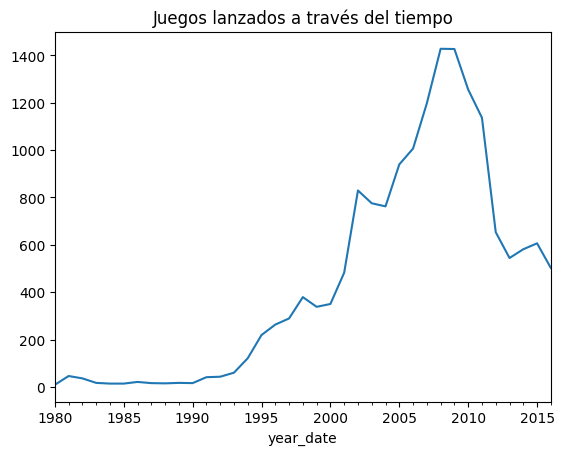

In [15]:
games.groupby("year_date")["name"].count().plot(kind="line", title= "Juegos lanzados a través del tiempo")

In [16]:
print(games.groupby("year_date")["name"].count())

year_date
1980-01-01       9
1981-01-01      46
1982-01-01      36
1983-01-01      17
1984-01-01      14
1985-01-01      14
1986-01-01      21
1987-01-01      16
1988-01-01      15
1989-01-01      17
1990-01-01      16
1991-01-01      41
1992-01-01      43
1993-01-01      60
1994-01-01     121
1995-01-01     219
1996-01-01     263
1997-01-01     289
1998-01-01     379
1999-01-01     338
2000-01-01     350
2001-01-01     482
2002-01-01     829
2003-01-01     775
2004-01-01     762
2005-01-01     939
2006-01-01    1006
2007-01-01    1197
2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2011-01-01    1136
2012-01-01     653
2013-01-01     544
2014-01-01     581
2015-01-01     606
2016-01-01     502
Name: name, dtype: int64


¿Son significativos los datos de cada período?

Se puede observar que desde el año 2006 al año 2011 son los años en los que hubo mayor numero de lanzamientos, a primera instancia podría esto ser cierto, sin embargo, debemos considerar que varios datos se repiten ya que el mismo juego se lanza para las diferentes consolas, esto puede estar fuertemente relacionado a que en ese rango de años había diferentes tipos de consolas en el mercado y el mismo juego salio para todas las plataformas.
Igualmente, se podrian excluir los valores antes de 1994 los cuales sus ventas son muy pequeñas comparados con años posteriores. 

•	Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

#### EVOLUCIÓN DE LAS VENTAS A TRAVÉS DEL TIEMPO

<AxesSubplot:xlabel='year_date'>

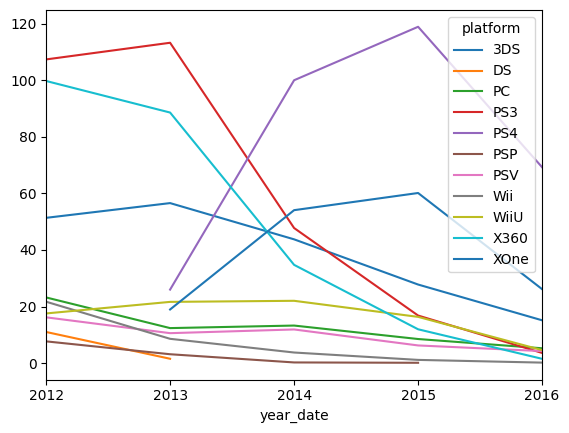

In [17]:
filtered_games = games.query("year_date > '2011-01-01'")
filtered_games.pivot_table(index="year_date", columns="platform", values="total_sales", aggfunc="sum").plot(kind="line")

En este gráfico podemos observar el comportamiento de las ventas por cada plataforma a través de los años, sin embargo, son demasiadas que es complicado observar a detalle el comportamiento de cada una. Por lo que, vamos a seleccionar el top 5 de las consolas.

<AxesSubplot:xlabel='year_date'>

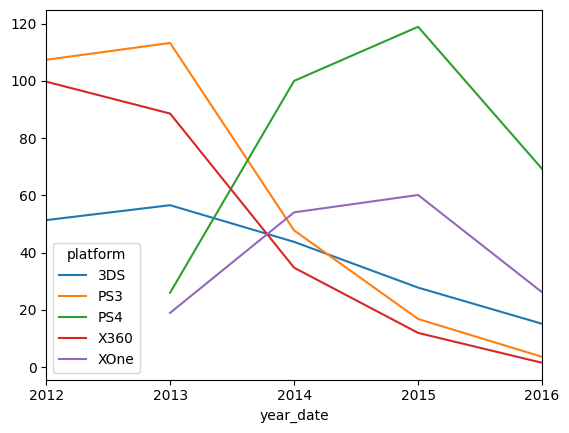

In [18]:
top_5_platforms = list(filtered_games.groupby("platform")["total_sales"].sum().sort_values().tail(5).index)
(
    filtered_games[filtered_games["platform"].isin(top_5_platforms)]
    .pivot_table(index= "year_date",
                 columns="platform",
                 values="total_sales",
                 aggfunc="sum")
    .plot(kind="line")
)


Como podemos observar a mayor detalle,existe mayor tendencia al periodo que habiamos mencionado antes del 2006 al 2011 donde varias de las consolas que tuvieron mayor cantidad de ventas se encuentran agrupadas.

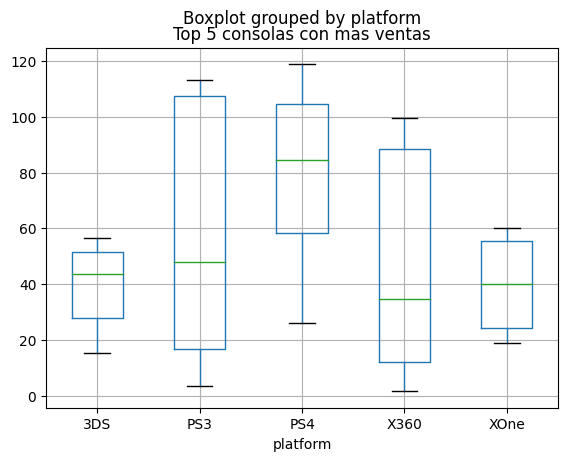

In [19]:
sales_by_year = filtered_games.groupby(["year_date","platform"])["total_sales"].sum().reset_index()
sales_by_year[sales_by_year["platform"].isin(top_5_platforms)][["total_sales","platform"]].boxplot(column="total_sales", by="platform")
plt.title("Top 5 consolas con mas ventas")
plt.show()


Se creo una distirbución de las 5 consolas con mas ventas tomando como referencia el año 2000 en adelante para estos datos.
Podemos concluir que:
* Tanto en playstation 2 y 3 la media de los videojuegos es elevada a comparación del wii que tiene buena cantidad de ventas pero las ventas promedio por titulo es la menor de las plataformas que se encuentran en el top 5.
* Por otro lado las ventas de xbox360 y las de PS3 son casi similares salvo por una pequeña ventaja que tiene xbox360.
* Con esta información podriamos concluir que las plataformas en las que es conveniente invertir es en primer lugar las consolas de Microsoft(Xbox) y por otro lado las consolas de Sony(PlayStation).
* Por otro lado existe una plataforma potencialmente rentable que se trata de la pc, que lleva varios años en el mercado.

In [20]:
# Obtener el año de primera y última aparición de cada plataforma
platform_lifetime = filtered_games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetime['duration'] = platform_lifetime['max'] - platform_lifetime['min']
platform_lifetime = platform_lifetime.sort_values(by='duration', ascending=False)
platform_lifetime

,min,max,duration
platform,,,
3DS,2012.0,2016.0,4.0
PC,2012.0,2016.0,4.0
PS3,2012.0,2016.0,4.0
PSV,2012.0,2016.0,4.0
Wii,2012.0,2016.0,4.0
WiiU,2012.0,2016.0,4.0
X360,2012.0,2016.0,4.0
PS4,2013.0,2016.0,3.0
PSP,2012.0,2015.0,3.0


In [21]:
print("El tiempo de vida promedio de una plataforma es de: ", platform_lifetime["duration"].mean(), "años.")

El tiempo de vida promedio de una plataforma es de:  3.4545454545454546 años.


<AxesSubplot:xlabel='platform'>

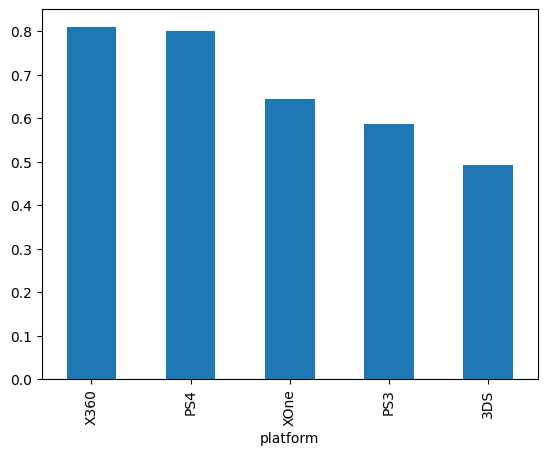

In [22]:
(
	filtered_games[filtered_games["platform"].isin(top_5_platforms)]
	.groupby("platform")["total_sales"]
	.mean()
	.sort_values(ascending=False)
	.plot(kind="bar")
)

Graficando el promedio de ventas por consolas podemos observar que los juegos lanzados en la consola Xbox360 se venden mas en promedio a diferencia de su competencia directa que es playstation 3

•	Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

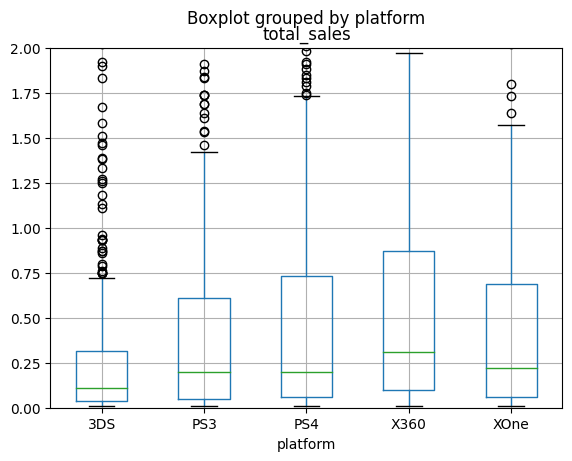

In [23]:
filtered_games[filtered_games["platform"].isin(top_5_platforms)][["total_sales","platform"]].boxplot(
    column="total_sales",
    by="platform"
)
plt.ylim(0,2)
plt.show()

Como podemos observar las ventas tanto de PS3 como de X360 son similares, sin embargo, las ventas de Wii son menores, y a su vez las ventas promedio para nintendo (Wii y DS) la media de ambas plataformas es menor a la mitad de la caja, dejando a PS3 y X360 como mejores opciones.

•	Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
•	Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

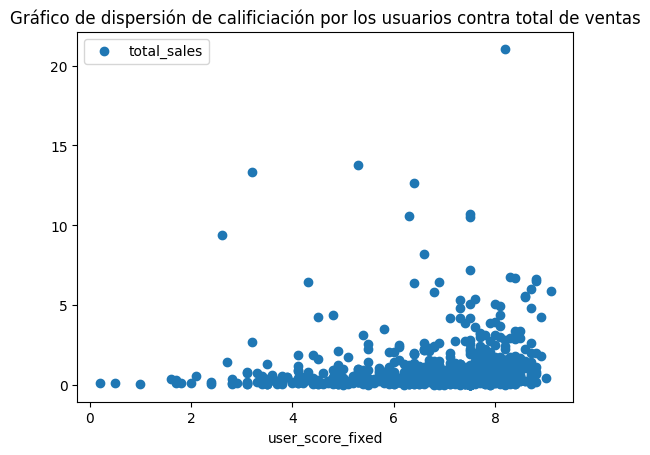

In [24]:
#Se crea un nuevo dataframe donde filtramos solamente los valores de PS3 y eliminamos los valores ausentes que habiamos modificado anteriormente
games_by_platform = games[(games['platform'] == 'PS3')& (games["user_score_fixed"]!=-1)].dropna()
games_by_platform.plot(x='user_score_fixed',
                       y='total_sales',
                       style='o', 
                       title= "Gráfico de dispersión de calificiación por los usuarios contra total de ventas"
)
plt.show()

In [25]:
filtered_games.query("platform == 'PS3'")[["total_sales","user_score_fixed"]].corr()

,total_sales,user_score_fixed
total_sales,1.000000,-0.026789
user_score_fixed,-0.026789,1.000000


Se puede apreciar que la correlación entre las reseñas de los usuarios y las ventas por plataforma PS3 mantienen una correlación muy baja por lo que se puede decir que las calificación de los usuarios no afecta las ventas de un juego.

Como podemos observar en la grafica nos muestra que no tenemos relación entre los juegos que tienen buena calificación por los usuarios contra el número de ventas, y nuestro coeficiente refuerza esta hipotesis.
Un juego puede tener una calificación de 10 en su genero, pero aún así no tener el impacto esperado en las ventas, ya que los usuarios de nicho de dicho genero son quienes califican el juego conforme a su experiencia. Asi que podemos tener juegos con calificación alta pero bajo numero de ventas. Y viceversa. 

Si tuvieramos una relación entre ambas variables nuestras ventas deberian ir aumentando conforme la calificación por los usurarios va aumentando.

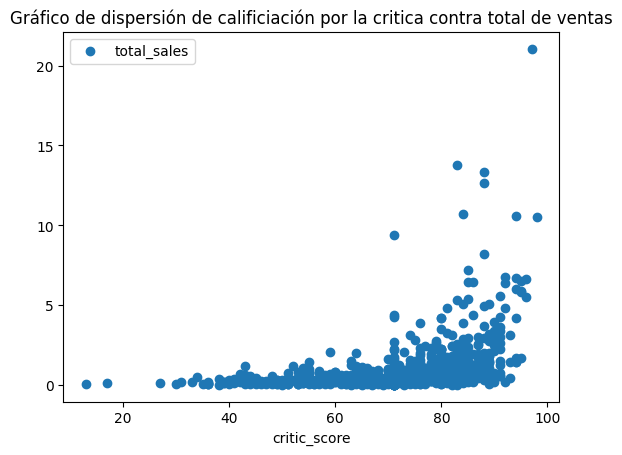

In [26]:
games_by_platform_cs = games[(games['platform'] == 'PS3')& (games["critic_score"]!=-1)].dropna() #se nombra un nuevo df
games_by_platform_cs.plot(x='critic_score',
                       y='total_sales',
                       style='o', 
                       title= "Gráfico de dispersión de calificiación por la critica contra total de ventas"
)
plt.show()

In [27]:
filtered_games.query("platform == 'PS3'")[["total_sales","critic_score"]].corr()

,total_sales,critic_score
total_sales,1.000000,0.312473
critic_score,0.312473,1.000000


Nuevamente tenemos el mismo efecto que en el anterior, no tenemos una relación fuerte entre las reseñas y las ventas, sin embargo, en este caso la correlación aumento un poco, por lo que si tuvieramos que tomar una decisión con respecto a mejorar alguna de las calificaciones para el exito de nuestro juego, tendríamos que mejorar la calificación de la critica.

#### COMPORTAMIENTO DE LOS JUEGOS POR GENERO

•	Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

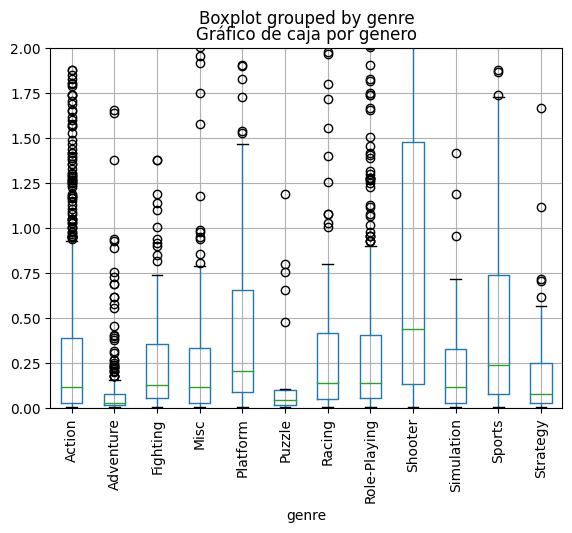

In [28]:
filtered_games.boxplot(column="total_sales", 
                       by="genre"
)
plt.title("Gráfico de caja por genero")
plt.ylim (0,2)
plt.xticks (rotation=90)
plt.show()

Se puede observar como algunos generos claramente son más populares que otros, por ejemplo, Shooter, Plataform, Sport, Fighting, Racing. Por lo que es mucho más rentable hacer un juego del genero shooter que uno de aventuras.


### PERFILES DE USARIO POR REGIÓN

Para cada región (NA, UE, JP) determina:

* Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
* Los cinco géneros principales. Explica la diferencia.
* Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


In [29]:
#Top 5 plataformas en NA
na_top_5_platforms = games.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5)
#Top 5 generos en NA
na_top_5_genre = games.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5)
#Top 5 rating en NA
na_top_5_rating = games.groupby("rating")["na_sales"].sum().sort_values(ascending=False).head(5)

#Top 5 plataformas en JP
jp_top_5_platforms = games.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5)
#Top 5 plataformas en JP
jp_top_5_genre = games.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(5)
#Top 5 rating en jp
jp_top_5_rating = games.groupby("rating")["jp_sales"].sum().sort_values(ascending=False).head(5)


#Top 5 plataformas en eu
eu_top_5_platforms = games.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5)
#Top 5 plataformas en eu
eu_top_5_genre = games.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5)
#Top 5 rating en eu
eu_top_5_rating = games.groupby("rating")["eu_sales"].sum().sort_values(ascending=False).head(5)


In [30]:
print(na_top_5_rating)

rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
Name: na_sales, dtype: float64


In [31]:
class UserProfile:
    def __init__(self, name, platform, genre, rating):
        self.name = name
        self.platform = platform
        self.genre = genre
        self.rating = rating

    def display_profile(self):
        print(f"Name: {self.name}")
        print(f"platform: {self.platform}")
        print(f"genre: {self.genre}")
        print(f"rating: {self.rating}")

In [32]:
# Ejemplo de uso
if __name__ == "__main__":
    # Crear un nuevo perfil de usuario
    na = UserProfile("NORTH AMERICA", na_top_5_platforms,na_top_5_genre, na_top_5_rating)
    jp = UserProfile("JAPAN", jp_top_5_platforms, jp_top_5_genre, jp_top_5_rating)
    eu = UserProfile("EUROPE", eu_top_5_platforms, eu_top_5_genre, jp_top_5_rating)

    # Mostrar el perfil del usuario
na.display_profile()
print()
jp.display_profile()
print()
eu.display_profile()

Name: NORTH AMERICA
platform: platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
genre: genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
rating: rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
Name: na_sales, dtype: float64

Name: JAPAN
platform: platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64
genre: genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64
rating: rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
Name: jp_sales, dtype: float64

Name: EUROPE
platform: platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
genre: genre
Action     519.13
Sp

* Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

En Norte america contamos que la plataforma mas popular es el xbox 360 y en su mayoria son plataformas fijas.
En Japon tenemos un cambio radical en las plataformas, ya que el top 5 pertenece a consolas portatiles, por lo que es mas probable que un juego tenga exito si de una consola portatil se trata en este mercado
En Europa tenemos un comportamiento similar al de norte america, sin embargo, los usuarios prefieren las consolas de Sony (playStations).


* Los cinco géneros principales. Explica la diferencia.

En norte america prefieren los juegos de accion,  deportes y disparos.
En japon los juegos RPG, accion y Deportes.
En Europa los juegos de acción, deportes y shooters.

* Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

En las tres regiones contamos con el mismo patron E- Everyone (Para todo publico), T- Teen (Adolescente) y M-Mature (Maduro), por lo que seria buena idea que el juego tuviera la clasificación E o T para asegurar buenas ventas. 

Estos son los tops por region, en este caso aunque accion aparece en las tres regiones recordaremos que anteriormente era de los juegos con menos impacto en ventas globales, por lo que si tuvieramos que hacer un juego rentable que se venda en las tres regiones, la mejor opcion seria deportes de rating "E" Everyone para todos

### PRUEBA DE HIPOTESIS

#### HIPOTESIS #1
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.


In [33]:
pc_mean_score= filtered_games[(filtered_games['platform'] == 'PC')].dropna()["user_score_fixed"]
xbox_one_mean_score= filtered_games[(filtered_games['platform'] == 'XOne')].dropna()["user_score_fixed"]


In [35]:
alpha = 0.05# tu código: establece un nivel crítico de significación estadística

#results = st.ttest_ind(xbox_one_mean_score, pc_mean_score, equal_var=False)# prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
stat, p_value = stats.levene(xbox_one_mean_score, pc_mean_score)


alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula: las varianzas son iguales")
else:
    print("Se rechaza la hipótesis nula: las varianzas no son iguales")
    

    


Se rechaza la hipótesis nula: las varianzas no son iguales


In [36]:
results = st.ttest_ind(xbox_one_mean_score, pc_mean_score, equal_var=False)

print('valor p:', results.pvalue) # tu código: imprime el valor p obtenido

if (results.pvalue > alpha): # su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.1895440021630431
Rechazamos la hipótesis nula


Gracias al Pvalue podemos concluir que las las medias entre las reseñas de PC y XboxOne existe una diferencia significativa.


#### HIPOTESIS #2
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [37]:
action_score= filtered_games[(filtered_games['genre'] == 'Action')].dropna()["user_score_fixed"]
sport_score= filtered_games[(filtered_games['genre'] == 'Sports')].dropna()["user_score_fixed"]

stat, p_value = stats.levene(action_score, sport_score)

alpha = 0.05

if p_value > alpha:
    print("No se rechaza la hipótesis nula: las varianzas son iguales")
else:
    print("Se rechaza la hipótesis nula: las varianzas no son iguales")
    


Se rechaza la hipótesis nula: las varianzas no son iguales


In [38]:
alpha = 0.05# tu código: establece un nivel crítico de significación estadística

results = st.ttest_ind(action_score, sport_score, equal_var=False)# prueba la hipótesis de que las medias de las dos poblaciones independientes son diferentes

print('valor p:', results.pvalue) # tu código: imprime el valor p obtenido)

if (results.pvalue > alpha): # su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 7.500090730721683e-18
No podemos rechazar la hipótesis nula


Podemos concluir que las medias entre las calificaciones por usuarios del genero accion y deporte guardan cierta relación por la que nuestra hipotesis nula queda rechazada.

Se aplicaron filtros para obtener la muestra de los valores que solamente necesitabamos generandonos una lista con esos valores, a cada una se le asigno su nombre de variable, y se comparo por medio de T-Student ya que estabamos comparando la media de dos poblaciones, el nivel de alfa se establecion en 0.05 para tener un 95% de confianza. 
* En el primer caso, buscamos que nuestro pvalue fuera menor que nuestro valor alfa para asegurar que existiera relacion entre ambas poblaciones.
* En el segundo caso, buscamos que nuestro pvalue fuera mayor que nuestro valor alfa, buscando que que ambas poblaciones fueran excluyentes, pero al final se rechazo.

### CONCLUSIÓN GENERAL

En conclusión, se importo el dataframe sin ninguna especificacion extra a python, se fueron agregando las bibliotecas que ibamos a utilizar durante el proyecto, posteriormente se analizaron las columnas del dataframe, para revisar su contenido y si requeria algun tratamiento especial, en este caso, se corrigieron los titulos de las columnas a minusculas, se cambiaron el tipo de user_score y se cambiaron los valores ausentes en critic_score y en rating se cambio el valor tbd por -1 para poder operar con esa columna, adicionalmente se creo una columna nueva la cual representaba el total de ventas por todos los medios de cada titulo.
Posteriormente en el analisis de datos, se exploro el comportamiento de las ventas totales a traves del tiempo, el comportamiento de los juegos, los generos mas populares y las consolas mas populares, y encontramos que hubo un crecimiento a partir del año 2006, tambien se establecio el tiempo promedio de vida de las nuevas consolas. 
obteniendo como resultado que las consolas de Microsoft (Xbox) son mas longevas y tienen mayor numero de ventas.
Igualmente, analisamos la posible relación entre las reseñas de los usuarios y las ventas generadas de lo cual podemos concluir que la relación es muy pobre para determinar el exito de un juego apartir de las reseñas por usuarios o por la critica.

Se generarion perfiles de usuarios por region, logramos obtener mediante la creacion de usuarios por region los top 5 de plataformas por region y los top 5 de generos por region. mostrandonos patrones que nos son de suma importancia para tomar una decisión comercial, si quisieramos invertir en un nuevo juego.

Finalmente, en la prueba de hipotesis, se comprobo a través del estudio con T-Student, que:
* Las medias de las calificaciones por usuarios entre pc y xbox one son iguales, de la cual rechazamos nuestra hipotesis.
* en segundo lugar, las media entre las calificaciones por usuarios entre el genero deportes y accion son diferente, de la cual rechazamos nuestra hipotesis, ya que si guardan relación entre ellas.

Este proyecto nos permite aplicar en varios ambitos lo que hemos aprendido a traves de estos meses y llevarlo a la practica, puliendo nuestras habilidades y conjuntando el conocimiento acumulado de diferentes sprints, acercandonos cada vez más a nuestra meta como analistas de datos.
